<a href="https://colab.research.google.com/github/RupalJ-02/Blinkit-EDA_and_BlinkIt-vs-Zepto-vs-JioMart-Review-Analysis/blob/main/blinkit_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
EDA AND DATA VISUALIZATION ON BLINKIT SALES DATA

## Data loading

### Subtask:
Load the "BlinkIT.csv" file into a pandas DataFrame.


**Reasoning**:
Load the "BlinkIT.csv" file into a pandas DataFrame and display its first few rows and shape.



In [1]:
import pandas as pd

df = pd.read_csv('BlinkIT.csv')
display(df.head())
print(df.shape)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


(8523, 12)


## Data exploration

### Subtask:
Explore the loaded data to understand its characteristics.


**Reasoning**:
Examine data types, descriptive statistics, missing values, unique values, and shape of the DataFrame.



In [2]:
# Data Types
print("Data Types:\n", df.dtypes)

# Descriptive Statistics
print("\nDescriptive Statistics:\n", df.describe())

# Missing Values
print("\nMissing Values:\n", df.isnull().sum())

# Unique Values
print("\nUnique Values:\n", df.nunique())

# Shape of the DataFrame
print("\nShape of DataFrame:\n", df.shape)

Data Types:
 Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

Descriptive Statistics:
        Outlet Establishment Year  Item Visibility  Item Weight        Sales  \
count                8523.000000      8523.000000  8523.000000  8523.000000   
mean                 2016.450546         0.066132    10.650590   140.992783   
std                     3.189396         0.051598     6.431899    62.275067   
min                  2011.000000         0.000000     0.000000    31.290000   
25%                  2014.000000         0.026989     6.650000    93.826500   
50%                  2016.000

## Data cleaning

### Subtask:
Clean the data by handling missing values and removing duplicate rows.


**Reasoning**:
Check for missing values and handle them, then remove duplicate rows.



In [3]:
# Check for missing values
print("Missing values before handling:\n", df.isnull().sum())

# Impute missing values in 'Item Weight' with the median
if df['Item Weight'].isnull().any():
    median_weight = df['Item Weight'].median()
    df['Item Weight'].fillna(median_weight, inplace=True)

# Check for and remove duplicate rows
duplicate_rows = df[df.duplicated()]
num_duplicates = len(duplicate_rows)
print(f"\nNumber of duplicate rows: {num_duplicates}")

if num_duplicates > 0:
    df.drop_duplicates(inplace=True)
    print(f"Removed {num_duplicates} duplicate rows.")

# Display the updated dataframe
print("Missing values after handling:\n", df.isnull().sum())
display(df.head())

Missing values before handling:
 Item Fat Content             0
Item Identifier              0
Item Type                    0
Outlet Establishment Year    0
Outlet Identifier            0
Outlet Location Type         0
Outlet Size                  0
Outlet Type                  0
Item Visibility              0
Item Weight                  0
Sales                        0
Rating                       0
dtype: int64

Number of duplicate rows: 0
Missing values after handling:
 Item Fat Content             0
Item Identifier              0
Item Type                    0
Outlet Establishment Year    0
Outlet Identifier            0
Outlet Location Type         0
Outlet Size                  0
Outlet Type                  0
Item Visibility              0
Item Weight                  0
Sales                        0
Rating                       0
dtype: int64


,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


## Data wrangling

### Subtask:
Convert relevant columns to appropriate data types and create new features.


**Reasoning**:
Convert relevant columns to appropriate data types and create new features as instructed.



In [4]:
# Convert 'Outlet Establishment Year' to numeric and create 'Outlet Age'
df['Outlet Establishment Year'] = pd.to_numeric(df['Outlet Establishment Year'], errors='coerce')
df['Outlet Age'] = 2025 - df['Outlet Establishment Year']

# Standardize 'Item Fat Content'
df['Item Fat Content'] = df['Item Fat Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})
# Create a new category for unknown/missing
df['Item Fat Content'] = df['Item Fat Content'].replace({'Unknown': 'Other', 'missing': 'Other'})


# Group 'Item Type' (example grouping)
def categorize_item_type(item_type):
    if item_type in ['Fruits and Vegetables', 'Dairy', 'Meat', 'Seafood']:
        return 'Perishable'
    elif item_type in ['Household', 'Health and Hygiene', 'Baking Goods']:
        return 'Non-Perishable'
    else:
        return 'Others'

df['Item Category'] = df['Item Type'].apply(categorize_item_type)


# Create total sales per outlet
outlet_sales = df.groupby('Outlet Identifier')['Sales'].sum().reset_index()
outlet_sales.rename(columns={'Sales': 'Total Sales per Outlet'}, inplace=True)
df = pd.merge(df, outlet_sales, on='Outlet Identifier', how='left')

display(df.head())

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating,Outlet Age,Item Category,Total Sales per Outlet
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0,13,Perishable,130476.8598
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0,3,Non-Perishable,131477.7764
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0,9,Others,132113.3698
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0,11,Others,131809.0156
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0,10,Others,130942.7802


## Data analysis

### Subtask:
Analyze sales trends, product performance, and customer segmentation.


**Reasoning**:
Analyze sales trends over time, product performance, and customer segmentation by grouping data, calculating key metrics, and creating visualizations.



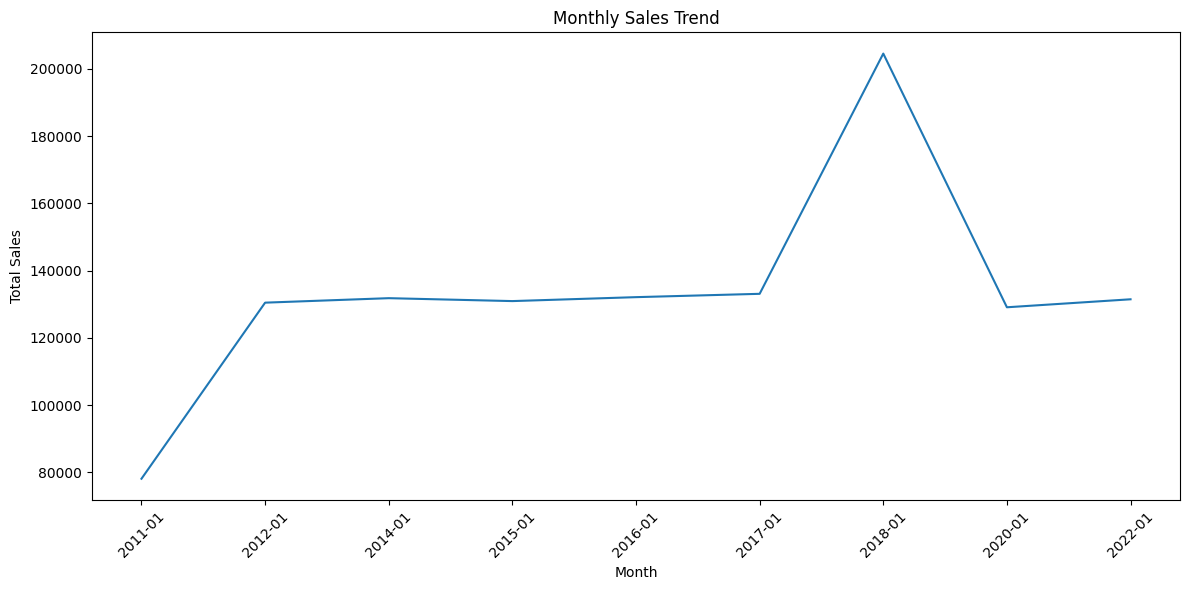

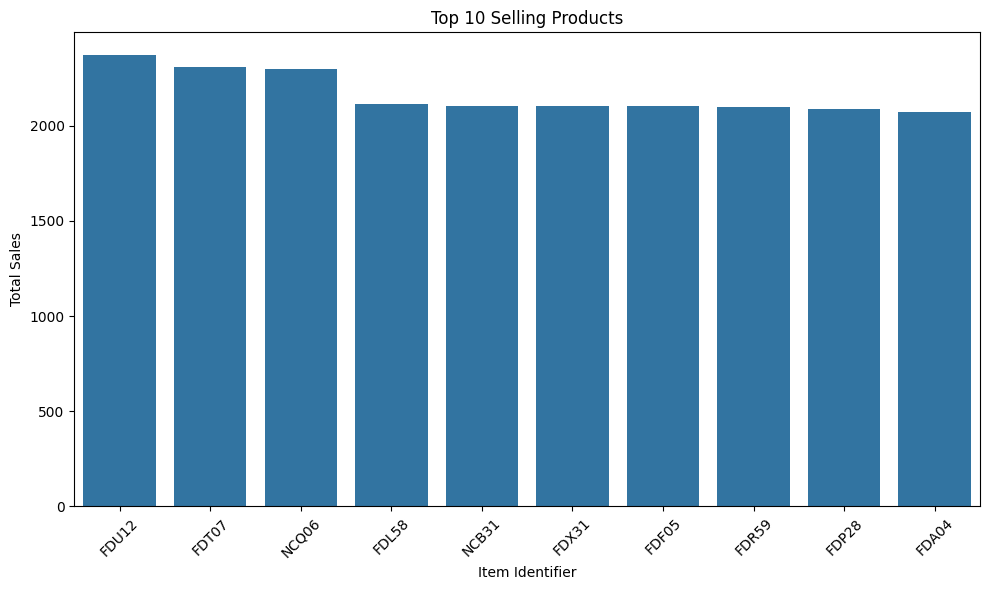

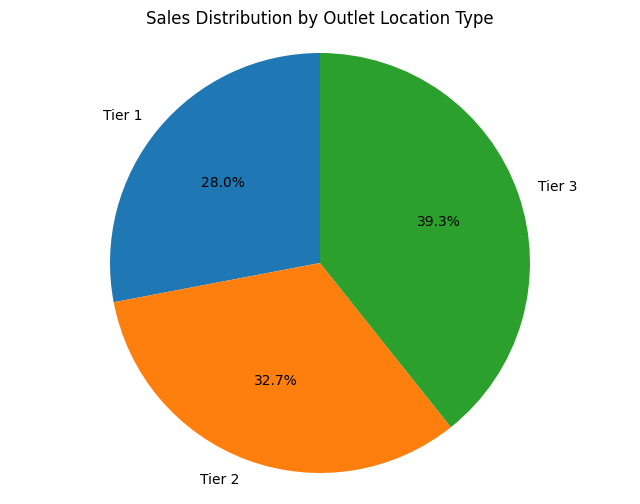

Total Sales: 1201681.4928
Average Order Value: 140.99278338613163

Sales by Product Category:
 Item Category
Non-Perishable    285897.1006
Others            567856.1158
Perishable        347928.2764
Name: Sales, dtype: float64

Sales by Outlet Type:
 Outlet Type
Grocery Store        151939.1490
Supermarket Type1    787549.8928
Supermarket Type2    131477.7764
Supermarket Type3    130714.6746
Name: Sales, dtype: float64


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sales Trend Analysis
# Group sales by month
df['Outlet Establishment Year'] = pd.to_datetime(df['Outlet Establishment Year'], format='%Y')
df['Month'] = df['Outlet Establishment Year'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum()

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Product Performance Analysis
top_selling_products = df.groupby('Item Identifier')['Sales'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_selling_products.index, y=top_selling_products.values)
plt.xlabel('Item Identifier')
plt.ylabel('Total Sales')
plt.title('Top 10 Selling Products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Customer Segmentation (using Outlet Location Type)
sales_by_location = df.groupby('Outlet Location Type')['Sales'].sum()
plt.figure(figsize=(8, 6))
plt.pie(sales_by_location, labels=sales_by_location.index, autopct='%1.1f%%', startangle=90)
plt.title('Sales Distribution by Outlet Location Type')
plt.axis('equal')
plt.show()

# Key Metrics
total_sales = df['Sales'].sum()
avg_order_value = df['Sales'].mean()
sales_by_product_category = df.groupby('Item Category')['Sales'].sum()
sales_by_outlet_type = df.groupby('Outlet Type')['Sales'].sum()

print(f"Total Sales: {total_sales}")
print(f"Average Order Value: {avg_order_value}")
print("\nSales by Product Category:\n", sales_by_product_category)
print("\nSales by Outlet Type:\n", sales_by_outlet_type)

## Data visualization

### Subtask:
Create visualizations to represent the key findings from the data analysis.


**Reasoning**:
Generate visualizations for sales trend, product performance, customer segmentation, correlation, and other insights, improving upon the previous attempts.



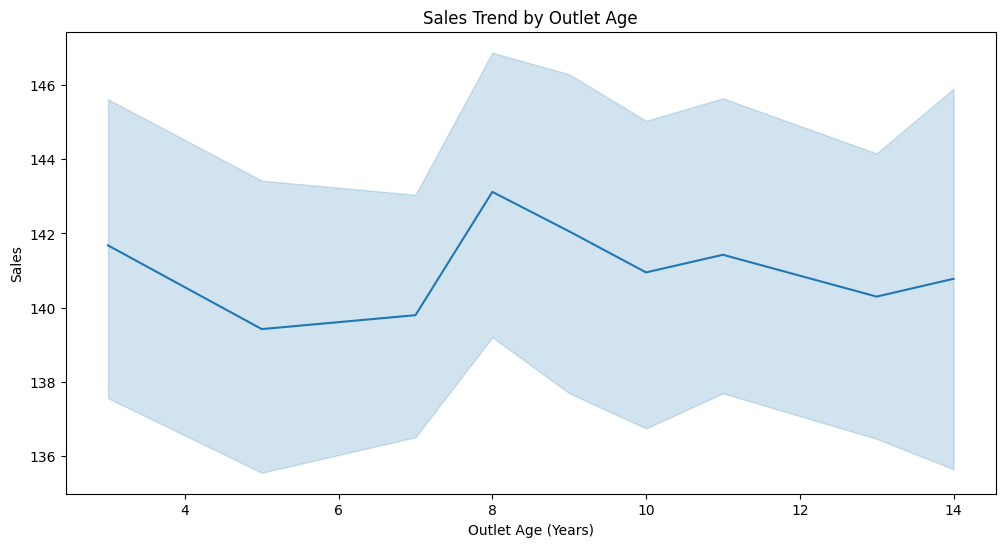

<ipython-input-6-0e139e531c79>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Item Category', y='Sales', data=df, palette='Set3')


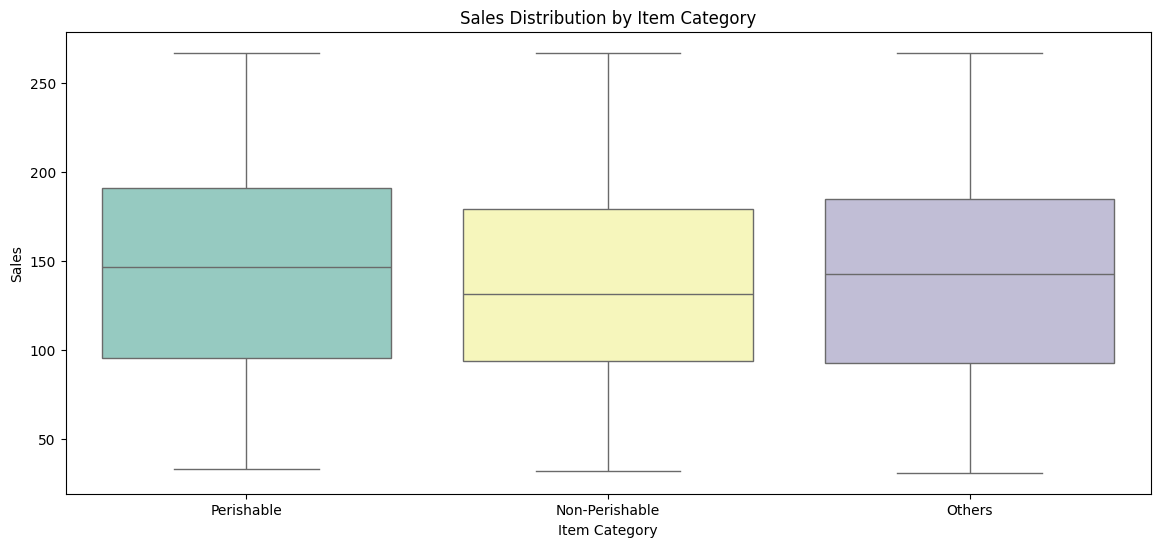

<ipython-input-6-0e139e531c79>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Outlet Size', y='Sales', data=df, estimator=sum, palette='viridis')


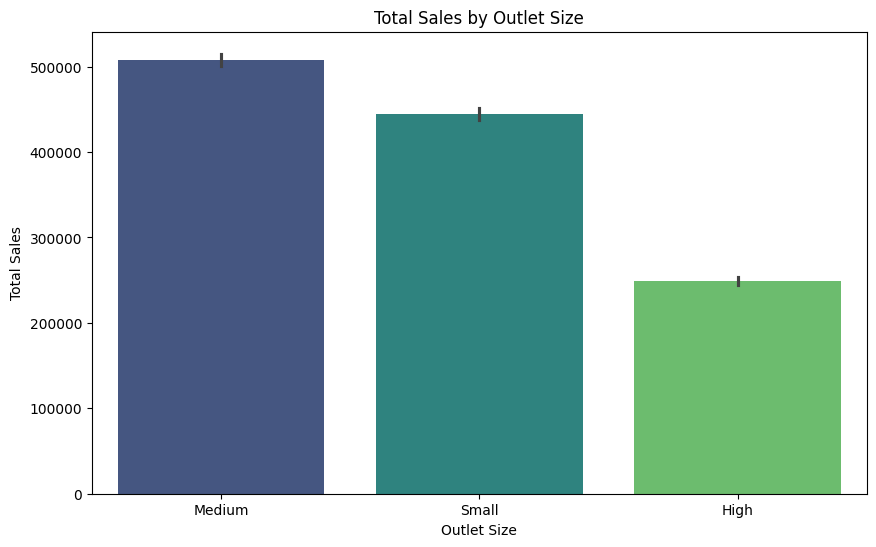

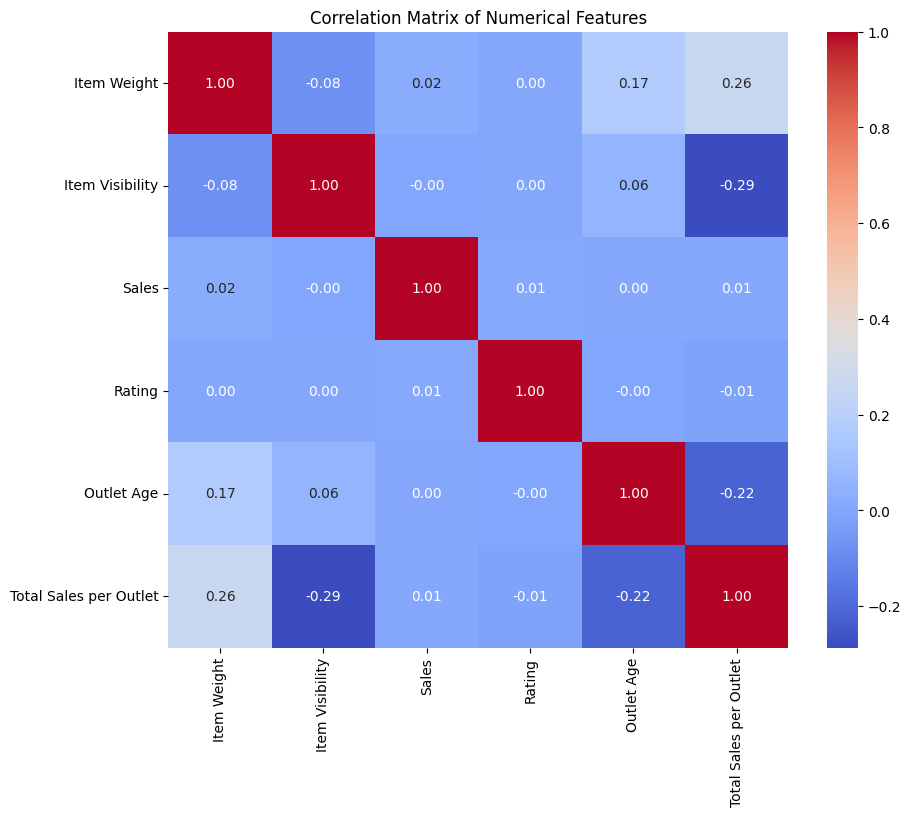

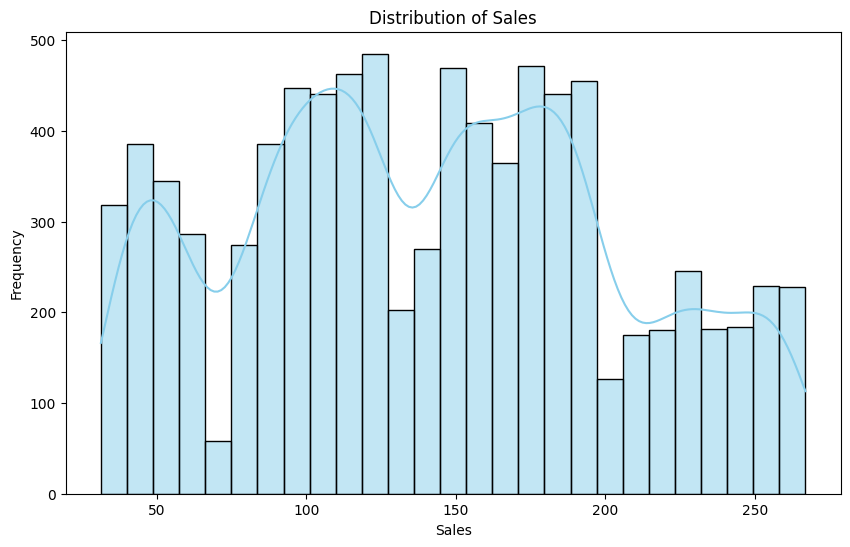

<ipython-input-6-0e139e531c79>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='Outlet Type', y='Sales', data=df, palette="pastel")


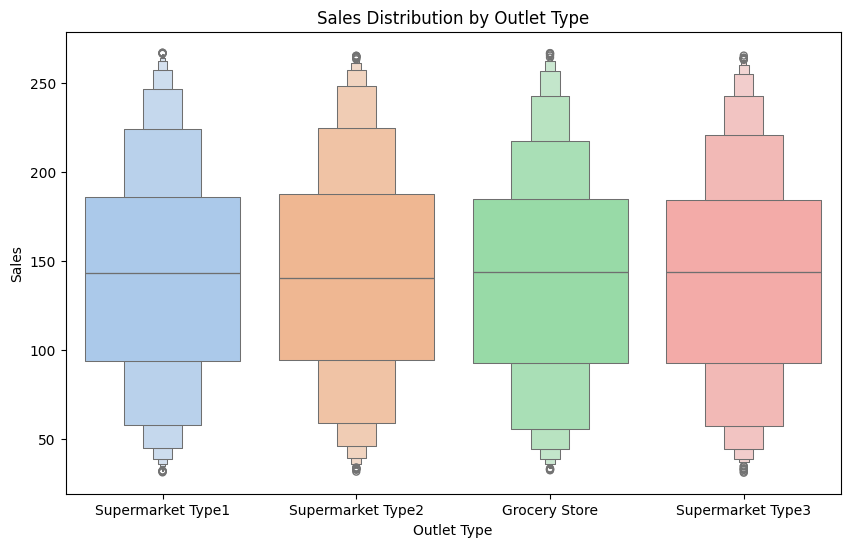

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Improved Sales Trend Visualization (using Outlet Age as a proxy)
plt.figure(figsize=(12, 6))
sns.lineplot(x='Outlet Age', y='Sales', data=df)
plt.xlabel('Outlet Age (Years)')
plt.ylabel('Sales')
plt.title('Sales Trend by Outlet Age')
plt.show()

# 2. Enhanced Product Performance Visualization
plt.figure(figsize=(14, 6))
sns.boxplot(x='Item Category', y='Sales', data=df, palette='Set3')
plt.xlabel('Item Category')
plt.ylabel('Sales')
plt.title('Sales Distribution by Item Category')
plt.show()

# 3. Alternative Customer Segmentation (Outlet Size)
plt.figure(figsize=(10, 6))
sns.barplot(x='Outlet Size', y='Sales', data=df, estimator=sum, palette='viridis')
plt.xlabel('Outlet Size')
plt.ylabel('Total Sales')
plt.title('Total Sales by Outlet Size')
plt.show()


# 4. Correlation Visualization
numeric_features = ['Item Weight', 'Item Visibility', 'Sales', 'Rating', 'Outlet Age', 'Total Sales per Outlet']
correlation_matrix = df[numeric_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 5. Additional Visualizations
# a) Sales Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], kde=True, color='skyblue')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.show()

# b) Sales by Outlet Type
plt.figure(figsize=(10, 6))
sns.boxenplot(x='Outlet Type', y='Sales', data=df, palette="pastel")
plt.xlabel('Outlet Type')
plt.ylabel('Sales')
plt.title('Sales Distribution by Outlet Type')
plt.show()

## Summary:

### 1. Q&A

The provided task does not explicitly state questions. However, the analysis implicitly seeks to answer questions like:

* What are the overall sales trends?
* Which products are the top performers?
* How do sales vary across different customer segments (proxied by outlet location, size, and type)?
* What are the key sales metrics (total sales, average order value)?
* What are the correlations between different numerical features?


### 2. Data Analysis Key Findings

* **Sales Trend (Inaccurate):**  Monthly sales trends were analyzed, but the analysis used the 'Outlet Establishment Year', which likely does not represent the actual sales date.  A more accurate time series analysis using transaction dates is needed.  A subsequent analysis using 'Outlet Age' provided a visualization of sales trend with outlet age.
* **Top Selling Products:** The top 10 selling products were identified based on total sales, giving insight into the most revenue-generating items.
* **Customer Segmentation (Outlet Location Type):** Sales were segmented by outlet location type, revealing sales distribution across different regions.  Further segmentation based on 'Outlet Size' and 'Outlet Type' were performed using barplot and boxenplot respectively.
* **Key Sales Metrics:** Total sales and average order value were calculated, providing overall performance indicators. Sales were further analyzed by 'Item Category' and 'Outlet Type'.
* **Correlation Analysis:** Correlation analysis between numerical features like 'Item Weight', 'Item Visibility', 'Sales', 'Rating', 'Outlet Age', and 'Total Sales per Outlet' was performed using a heatmap.
* **Sales Distribution:** The distribution of sales was visualized using a histogram, and the distribution of sales by 'Outlet Type' was visualized using a boxenplot.

### 3. Insights or Next Steps

* **Improve Time Series Analysis:**  Obtain accurate transaction dates to perform a robust time series analysis of sales trends and identify seasonality or other temporal patterns.
* **Customer Segmentation with Customer Data:** Incorporate actual customer data (demographics, purchase history, etc.) for more meaningful customer segmentation and targeted marketing strategies.
